# Mini model and ATP yield

## Mini model

In [27]:
import copy
import reframed
import cobra
from reframed import FBA, Environment
import pandas as pd

In [28]:
dict_ = {"exclusive": [
        "test_annotation",
        "test_basic",
        "test_biomass",
        "test_matrix",
        "test_sbo",
        "test_thermodynamics"
    ]
}

In [29]:
import json
with open("exclusive_tests.json", "w") as json_file:
    json.dump(dict_, json_file, indent=4)  # `indent=4` formats the JSON for readability

print("JSON file saved as 'exclusive_tests.json'")

JSON file saved as 'exclusive_tests.json'


In [30]:
import sys
sys.path.append("../functions/")
import mini_model_function

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
model = reframed.load_cbmodel("../models/RcH10_v2.xml")

model_uni_cobra = cobra.io.read_sbml_model("../models/universe_grampos.xml")

model_cobra = cobra.io.read_sbml_model('../models/RcH10_v2.xml')

model_uni = reframed.load_cbmodel("../models/universe_grampos.xml")

### Load models

In [33]:
model_iFS431 = reframed.load_cbmodel("../models/iFS431.xml",load_gprs=False,flavor="cobra")
model_iFS431.reactions.R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_.lb=0
model_iFS431.reactions.R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_.ub=1000

mini_model =  mini_model_function.build_mini_model()
mini_model.add_reaction_from_str("R_EX_gtp_c: M_gtp_c -->")
mini_model.add_reaction_from_str("R_EX_gdp_c: M_gdp_c -->")
mini_model.add_reaction_from_str("R_EX_pi_c: M_pi_c -->")
mini_model.add_reaction_from_str("R_EX_ppi_c: M_ppi_c -->")

mini_model_inf = mini_model_function.build_mini_model(unique_cofactors=False)

In [34]:
model_iFS431.reactions.R_EX_BIOMASS_LPAREN_e_RPAREN_

R_EX_BIOMASS_LPAREN_e_RPAREN_: M_cpd11416_e -->  @nan

In [35]:
model_iFS431.get_metabolite_reactions("M_cpd11416_c")

['R_BIOMASS']

In [36]:
model_iFS431.reactions.R_BIOMASS

R_BIOMASS: 40.0 M_cpd00002_c + 40.0 M_cpd00001_c + 0.5284 M_cpd11463_c + 0.026 M_cpd11461_c + 0.0655 M_cpd11613_c + 0.076 M_cpdcce02_c + M_cpdcce01_c + 0.0494 M_cpdcce04_c --> 40.0 M_cpd00008_c + 40.0 M_cpd00067_c + 40.0 M_cpd00009_c + M_cpd11416_c @nan

In [37]:
for met in model_iFS431.reactions.R_BIOMASS.get_substrates():
    print(f"{model_iFS431.metabolites[met].name}: {model_iFS431.metabolites[met].id}")

ATP: M_cpd00002_c
H2O: M_cpd00001_c
PROTEIN: M_cpd11463_c
DNA: M_cpd11461_c
RNA: M_cpd11613_c
PLIPID: M_cpdcce02_c
CELLWALL: M_cpdcce01_c
TRACE: M_cpdcce04_c


In [38]:
model_iFS431.get_metabolite_reactions("M_cpd11463_c")

['R_R26', 'R_BIOMASS']

In [39]:
for met in model_iFS431.reactions.R_R26.get_substrates():
    print(f"{model_iFS431.metabolites[met].name}: {model_iFS431.metabolites[met].id}")

ATP: M_cpd00002_c
H2O: M_cpd00001_c
L-Arginine: M_cpd00051_c
L-Asparagine: M_cpd00132_c
L-Aspartate: M_cpd00041_c
L-Lysine: M_cpd00039_c
L-Threonine: M_cpd00161_c
Glycine: M_cpd00033_c
L-Serine: M_cpd00054_c
L-Glutamate: M_cpd00023_c
L-Tryptophan: M_cpd00065_c
L-Glutamine: M_cpd00053_c
L-Methionine: M_cpd00060_c
L-Proline: M_cpd00129_c
L-Leucine: M_cpd00107_c
L-Valine: M_cpd00156_c
L-Isoleucine: M_cpd00322_c
L-Histidine: M_cpd00119_c
L-Cysteine: M_cpd00084_c
L-Alanine: M_cpd00035_c
L-Tyrosine: M_cpd00069_c
L-Phenylalanine: M_cpd00066_c


In [40]:
model_iFS431.metabolites.M_cpd00009_c

Phosphate

In [41]:
model_iFS431.reactions.R_R26

R_R26: 37.195 M_cpd00002_c + 37.195 M_cpd00001_c + 0.133 M_cpd00051_c + 0.156 M_cpd00132_c + 0.156 M_cpd00041_c + 0.336 M_cpd00039_c + 0.41 M_cpd00161_c + 1.078 M_cpd00033_c + 0.427 M_cpd00054_c + 0.127 M_cpd00023_c + 0.043 M_cpd00065_c + 0.127 M_cpd00053_c + 0.783 M_cpd00060_c + 0.457 M_cpd00129_c + 0.429 M_cpd00107_c + 1.172 M_cpd00156_c + 0.436 M_cpd00322_c + 0.146 M_cpd00119_c + 1.216 M_cpd00084_c + 0.775 M_cpd00035_c + 0.801 M_cpd00069_c + 0.185 M_cpd00066_c --> 37.195 M_cpd00008_c + 37.195 M_cpd00067_c + 37.195 M_cpd00009_c + M_cpd11463_c @nan

### Create minimal glucose environment

In [42]:
env = Environment.from_reactions(["R_EX_h_e","R_EX_h2o_e","R_EX_glc__D_e","R_EX_atp_c","R_EX_gtp_c","R_EX_ppi_c","R_EX_nad_c"])
env["R_EX_h2o_e"]=(-1000,1000)
env["R_EX_h_e"]=(-1000,1000)


rxns_from_env = ["R_EX_"+x.split("_")[2] for x in env.keys()]
exchange_rxns = model_iFS431.get_exchange_reactions()
exchange_rxns_dict = {"_".join(x.split("_")[0:3]):x for x in exchange_rxns}
env_old_model = Environment.from_reactions([old_id for new_id, old_id in exchange_rxns_dict.items() if new_id in rxns_from_env])
env_old_model["R_EX_h2o_LPAREN_e_RPAREN_"]=(-100,100)
env_old_model["R_EX_h_LPAREN_e_RPAREN_"]=(-100,100)


rxns_new = ["R_EX_ac_e","R_EX_etoh_e","R_EX_lac__L_e","R_ATPM"]
rxns_inf = ["R_EX_ac_LPAREN_e_RPAREN_","R_EX_etoh_LPAREN_e_RPAREN_","R_EX_lac_DASH_D_LPAREN_e_RPAREN_","R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_"]

rxns_dict = dict(zip(rxns_inf,rxns_new))

#### Apply environment

In [43]:
env.apply(mini_model,inplace=True,warning=False)
env.apply(mini_model_inf,inplace=True,warning=False)
env.apply(model,inplace=True,warning=False)
env_old_model.apply(model_iFS431,inplace=True,warning=False)

### Maximizing production of different compounds

In [44]:
fba_results = {}

for model_id,model_spec in {"mini_model":mini_model,"model":model,"mini_model_inf":mini_model_inf,"model_iFS431":model_iFS431}.items():
    
    if model_id=="model_iFS431":
        rxns = rxns_inf
    else:
        rxns = rxns_new
        
    fba_results[model_id]={}
    fba_results[model_id] = {}
    

    for rxn in rxns:
        objective = {rxn:0 for rxn in model_spec.reactions.keys()}
        objective[rxn]=1
        model_spec.set_objective(objective)
        if model_id=="model_iFS431":
            fba_results[model_id][rxns_dict[rxn]] = reframed.FBA(model_spec).fobj
        else:
            
            fba_results[model_id][rxn]= reframed.FBA(model_spec,objective={rxn:1}).fobj
            
            
        

In [45]:
pd.DataFrame(fba_results)

,mini_model,model,mini_model_inf,model_iFS431
R_EX_ac_e,20.0,20.0,20.0,20.0
R_EX_etoh_e,20.0,20.0,20.0,20.0
R_EX_lac__L_e,20.0,20.0,20.0,20.0
R_ATPM,45.0,30.0,30.0,40.0


In [46]:
sol = reframed.pFBA(mini_model_inf,objective="R_ATPM")

sol.show_values(pattern="R_EX_",sort=True)

R_EX_h2o_e   -20
R_EX_glc__D_e -10
R_EX_h_e      20
R_EX_co2_e    20
R_EX_ac_e     20
R_EX_h2_e     40


In [47]:
sol.show_metabolite_balance("M_nadh_c",mini_model_inf,equations=True)

[ --> o ] R_GAPD        20       	M_g3p_c + M_nad_c + M_pi_c <-> M_13dpg_c + M_h_c + M_nadh_c
[ <-- o ] R_FNRR       -20       	2.0 M_fdxrd_c + M_h_c + M_nad_c <-> 2.0 M_fdxo_2_2_c + M_nadh_c


In [48]:
sol.show_metabolite_balance("M_fdxrd_c",mini_model_inf,equations=True)

[ --> o ] R_POR_syn     40       	M_coa_c + 2.0 M_fdxo_2_2_c + M_pyr_c --> M_accoa_c + M_co2_c + 2.0 M_fdxrd_c + M_h_c
[ o <-- ] R_FNRR        40       	2.0 M_fdxrd_c + M_h_c + M_nad_c <-> 2.0 M_fdxo_2_2_c + M_nadh_c
[ <-- o ] R_FNRR3      -80       	2.0 M_fdxo_2_2_c + M_h2_c <-> 2.0 M_fdxrd_c + 2.0 M_h_c


In [23]:
sol = reframed.pFBA(model,objective="R_ATPM")

sol.show_values(pattern="R_EX_",sort=True)

R_EX_h2o_e   -20
R_EX_glc__D_e -10
R_EX_ac_e     20
R_EX_co2_e    20
R_EX_h_e      20
R_EX_h2_e     40


In [24]:
sol.show_metabolite_balance("M_nadh_c",mini_model_inf,equations=True)

[ --> o ] R_GAPD        20       	M_g3p_c + M_nad_c + M_pi_c <-> M_13dpg_c + M_h_c + M_nadh_c
[ <-- o ] R_FNRR       -20       	2.0 M_fdxrd_c + M_h_c + M_nad_c <-> 2.0 M_fdxo_2_2_c + M_nadh_c


In [25]:
sol.show_metabolite_balance("M_fdxrd_c",mini_model_inf,equations=True)

[ --> o ] R_POR_syn     40       	M_coa_c + 2.0 M_fdxo_2_2_c + M_pyr_c --> M_accoa_c + M_co2_c + 2.0 M_fdxrd_c + M_h_c
[ o <-- ] R_FNRR        40       	2.0 M_fdxrd_c + M_h_c + M_nad_c <-> 2.0 M_fdxo_2_2_c + M_nadh_c
[ <-- o ] R_FNRR3      -80       	2.0 M_fdxo_2_2_c + M_h2_c <-> 2.0 M_fdxrd_c + 2.0 M_h_c


In [49]:
sol.show_metabolite_balance("M_nadh_c",mini_model_inf,equations=True)

[ --> o ] R_GAPD        20       	M_g3p_c + M_nad_c + M_pi_c <-> M_13dpg_c + M_h_c + M_nadh_c
[ <-- o ] R_FNRR       -20       	2.0 M_fdxrd_c + M_h_c + M_nad_c <-> 2.0 M_fdxo_2_2_c + M_nadh_c


In [50]:
sol.show_metabolite_balance("M_h_c",mini_model_inf,equations=True)

[ --> o ] R_GLCabc      10       	M_atp_c + M_glc__D_e + M_h2o_c --> M_adp_c + M_glc__D_c + M_h_c + M_pi_c
[ --> o ] R_HEX1        10       	M_atp_c + M_glc__D_c --> M_adp_c + M_g6p_c + M_h_c
[ --> o ] R_PFK         10       	M_atp_c + M_f6p_c --> M_adp_c + M_fdp_c + M_h_c
[ --> o ] R_GAPD        20       	M_g3p_c + M_nad_c + M_pi_c <-> M_13dpg_c + M_h_c + M_nadh_c
[ --> o ] R_POR_syn     20       	M_coa_c + 2.0 M_fdxo_2_2_c + M_pyr_c --> M_accoa_c + M_co2_c + 2.0 M_fdxrd_c + M_h_c
[ --> o ] R_ATPM        30       	M_atp_c + M_h2o_c --> M_adp_c + M_h_c + M_pi_c
[ o <-- ] R_FNRR        20       	2.0 M_fdxrd_c + M_h_c + M_nad_c <-> 2.0 M_fdxo_2_2_c + M_nadh_c
[ o --> ] R_PYK        -20       	M_adp_c + M_h_c + M_pep_c --> M_atp_c + M_pyr_c
[ <-- o ] R_ACt2r      -20       	M_ac_e + M_h_e <-> M_ac_c + M_h_c
[ <-- o ] R_FNRR3      -80       	2.0 M_fdxo_2_2_c + M_h2_c <-> 2.0 M_fdxrd_c + 2.0 M_h_c


In [26]:
sol.show_metabolite_balance("M_cpd00004_c",model_iFS431,equations=True)

KeyError: 'R_ME1'

In [ ]:
sol = reframed.pFBA(model_iFS431,objective="R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_")

sol.show_values(pattern="R_EX_",sort=True)

In [ ]:
sol.show_metabolite_balance("M_cpd00004_c",model_iFS431,equations=True)

In [ ]:
sol.show_metabolite_balance("M_cpd15877_c",model_iFS431,equations=True)

In [ ]:
atp_rxns_new = {"R_POR_syn":'Pyruvate-ferredoxin oxidoreductase',
            "R_FNRR":'NADH Ferredoxin oxidoreductase',
            "R_FNRR2":'NADPH Ferredoxin oxidoreductase',
            "R_FNRR3":'Ferredoxin hydrogenase',
            "R_ATPS4r":'ATP synthase',
            "R_EX_ac_e":"Acetate exchange",
            "R_EX_etoh_e":"Ethanol exchange",
            "R_EX_lac__L_e":"L-Lactate exchange",
            "R_EX_h2_e":"Dihydrogen exchange"}


atp_rxns_old = {"R_POR":'Pyruvate-ferredoxin oxidoreductase',
            "R_FNOR2":'NADH Ferredoxin oxidoreductase',
            "R_FNOR3":'NADPH Ferredoxin oxidoreductase',
            "R_FRHD":'Ferredoxin hydrogenase',
            "R_ATPS4r":'ATP synthase',
            "R_EX_ac_LPAREN_e_RPAREN_":"Acetate exchange",
            "R_EX_etoh_LPAREN_e_RPAREN_":"Ethanol exchange",
            "R_EX_lac_DASH_D_LPAREN_e_RPAREN_":"L-Lactate exchange",
            "R_EX_h2_LPAREN_e_RPAREN_":"Dihydrogen exchange"}


max_atp = {}
for model_id,model_spec in {"mini_model":mini_model,"model":model,"mini_model_inf":mini_model_inf,"model_iFS431":model_iFS431}.items():
    
    if model_id=="model_iFS431":
        atpm_rxn = "R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_"
        rxns = atp_rxns_old
    else:
        atpm_rxn = "R_ATPM"
        rxns = atp_rxns_new
    max_atp[model_id] = {}
    
    objective = {rxn:0 for rxn in model_spec.reactions.keys()}
    objective[atpm_rxn]=1
    model_spec.set_objective(objective)
    
    sol = reframed.pFBA(model_spec)
    

    for rxn_id,rxn_name in rxns.items():
        if model_id.startswith("mini") and rxn_id=="R_FNRR2":
            max_atp[model_id][rxn_name]=None
            
        else:
            max_atp[model_id][rxn_name]=sol.values[rxn_id]
        

In [18]:
pd.DataFrame(max_atp).fillna(0)

,mini_model,model,mini_model_inf,model_iFS431
Pyruvate-ferredoxin oxidoreductase,20.0,20.0,20.0,20.0
NADH Ferredoxin oxidoreductase,-20.0,-20.0,-20.0,20.0
NADPH Ferredoxin oxidoreductase,0.0,0.0,0.0,0.0
Ferredoxin hydrogenase,-40.0,-40.0,-40.0,40.0
ATP synthase,-5.0,0.0,0.0,0.0
Acetate exchange,20.0,20.0,20.0,20.0
Ethanol exchange,-0.0,-0.0,-0.0,0.0
L-Lactate exchange,-0.0,0.0,-0.0,0.0
Dihydrogen exchange,40.0,40.0,40.0,40.0


**THe HEX1 reaction in iFS431 is missing a proton**

In [733]:
sol = reframed.pFBA(model_iFS431)
sol.show_metabolite_balance("M_cpd00067_c",model_iFS431,equations=True,sort=True)

[ --> o ] R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_  40       	M_cpd00002_c + M_cpd00001_c --> M_cpd00008_c + M_cpd00067_c + M_cpd00009_c
[ --> o ] R_GAPD        20       	M_cpd00009_c + M_cpd00102_c + M_cpd00003_c <-> M_cpd00067_c + M_cpd00203_c + M_cpd00004_c
[ --> o ] R_POR         20       	M_cpd00020_c + M_cpd00010_c + M_cpd15876_c <-> M_cpd00067_c + M_cpd00011_c + M_cpd00022_c + M_cpd15877_c
[ --> o ] R_FNOR2       20       	M_cpd00004_c + M_cpd15876_c <-> M_cpd00067_c + M_cpd00003_c + M_cpd15877_c
[ --> o ] R_PFK         10       	M_cpd00002_c + M_cpd00072_c --> M_cpd00008_c + M_cpd00067_c + M_cpd00290_c
[ o --> ] R_FRHD       -80       	2.0 M_cpd00067_c + M_cpd15877_c --> M_cpd15876_c + M_cpd11640_c
[ <-- o ] R_ACt6       -20       	M_cpd00067_e + M_cpd00029_e <-> M_cpd00067_c + M_cpd00029_c
[ o --> ] R_PYK        -10       	M_cpd00008_c + M_cpd00067_c + M_cpd00061_c --> M_cpd00002_c + M_cpd00020_c


In [734]:
sol = reframed.pFBA(mini_model_inf)
sol.show_metabolite_balance("M_h_c",mini_model_inf,equations=True,sort=True)

[ --> o ] R_GAPD        20       	M_g3p_c + M_nad_c + M_pi_c <-> M_13dpg_c + M_h_c + M_nadh_c
[ --> o ] R_POR_syn     20       	M_coa_c + 2.0 M_fdxo_2_2_c + M_pyr_c --> M_accoa_c + M_co2_c + 2.0 M_fdxrd_c + M_h_c
[ --> o ] R_ATPM        20       	M_atp_c + M_h2o_c --> M_adp_c + M_h_c + M_pi_c
[ o <-- ] R_ACt2r_1     20       	M_ac_e + M_h_c <-> M_ac_c + M_h_e
[ o <-- ] R_FNRR        20       	2.0 M_fdxrd_c + M_h_c + M_nad_c <-> 2.0 M_fdxo_2_2_c + M_nadh_c
[ --> o ] R_GLCabc      10       	M_atp_c + M_glc__D_e + M_h2o_c --> M_adp_c + M_glc__D_c + M_h_c + M_pi_c
[ --> o ] R_HEX1        10       	M_atp_c + M_glc__D_c --> M_adp_c + M_g6p_c + M_h_c
[ --> o ] R_PFK         10       	M_atp_c + M_f6p_c --> M_adp_c + M_fdp_c + M_h_c
[ <-- o ] R_FNRR3      -80       	2.0 M_fdxo_2_2_c + M_h2_c <-> 2.0 M_fdxrd_c + 2.0 M_h_c
[ <-- o ] R_ATPS4r     -30       	M_adp_c + M_pi_c + 4.0 M_h_e <-> M_atp_c + 3.0 M_h_c + M_h2o_c
[ o --> ] R_PYK        -20       	M_adp_c + M_h_c + M_pep_c --> M_atp_c + M_pyr

In [735]:
model_cobra.reactions.HEX1_gtp.check_mass_balance()

{}

In [736]:
from reframed import plot_flux_envelope

<Axes: xlabel='ATPM (mmol/gh)', ylabel='R_EX_lac__L_e'>

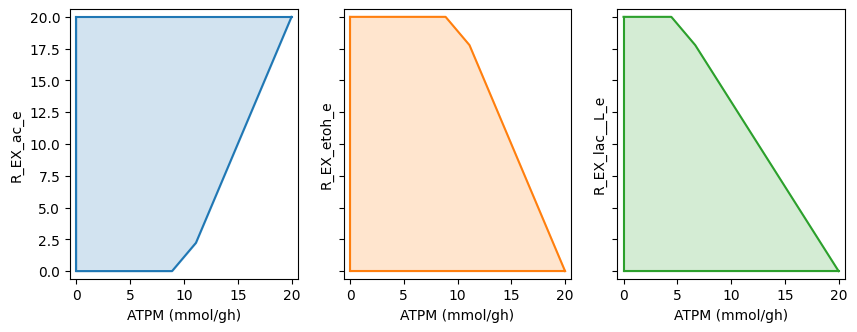

In [737]:

fig, axs = plt.subplots(1,3, figsize=(10,3.5), sharey=True, sharex=True)
plot_flux_envelope(model, 'R_ATPM', 'R_EX_ac_e', ax=axs[0], label_x='ATPM (mmol/gh)', 
                   plot_kwargs={'color': 'tab:blue'}, fill_kwargs={'color': 'tab:blue', 'alpha':0.2})
plot_flux_envelope(model, 'R_ATPM', 'R_EX_etoh_e', ax=axs[1], label_x='ATPM (mmol/gh)', 
                   plot_kwargs={'color': 'tab:orange'}, fill_kwargs={'color': 'tab:orange', 'alpha':0.2})
plot_flux_envelope(model, 'R_ATPM', 'R_EX_lac__L_e',ax=axs[2], label_x='ATPM (mmol/gh)', 
                   plot_kwargs={'color': 'tab:green'}, fill_kwargs={'color': 'tab:green', 'alpha':0.2})

<Axes: xlabel='ATPM (mmol/gh)', ylabel='EX_lac-D(e)'>

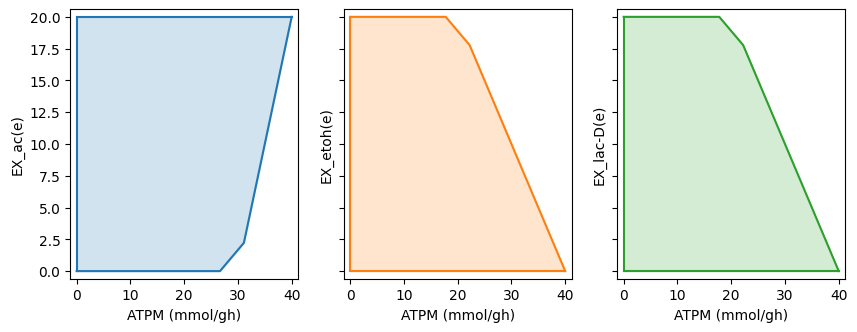

In [740]:

fig, axs = plt.subplots(1,3, figsize=(10,3.5), sharey=True, sharex=True)
plot_flux_envelope(model_iFS431, 'R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_', 'R_EX_ac_LPAREN_e_RPAREN_', ax=axs[0], label_x='ATPM (mmol/gh)', 
                   plot_kwargs={'color': 'tab:blue'}, fill_kwargs={'color': 'tab:blue', 'alpha':0.2})
plot_flux_envelope(model_iFS431, 'R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_', 'R_EX_etoh_LPAREN_e_RPAREN_', ax=axs[1], label_x='ATPM (mmol/gh)', 
                   plot_kwargs={'color': 'tab:orange'}, fill_kwargs={'color': 'tab:orange', 'alpha':0.2})
plot_flux_envelope(model_iFS431, 'R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_', 'R_EX_lac_DASH_D_LPAREN_e_RPAREN_',ax=axs[2], label_x='ATPM (mmol/gh)', 
                   plot_kwargs={'color': 'tab:green'}, fill_kwargs={'color': 'tab:green', 'alpha':0.2})

## iFS431

In [644]:
import pandas as pd
import reframed

In [645]:
model_iFS431 = reframed.load_cbmodel("../models/iFS431.xml",load_gprs=False,flavor="cobra")
model_iFS431.reactions.R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_.lb=0
model_iFS431.reactions.R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_.ub=1000

media = pd.read_csv('../input/media_db.tsv',sep='\t')
media_cellb = media[media.medium=='DM_cellobiose']
env_cellb = Environment.from_compounds(list(media_cellb['compound']))
rxns_from_env = ["R_EX_"+x.split("_")[2] for x in env_cellb.keys()]

exchange_rxns = model_iFS431.get_exchange_reactions()
exchange_rxns_dict = {"_".join(x.split("_")[0:3]):x for x in exchange_rxns}

env_old_model = Environment.from_reactions([old_id for new_id, old_id in exchange_rxns_dict.items() if new_id in rxns_from_env])
env_old_model["R_EX_glc_LPAREN_e_RPAREN_"] = (-10,0)
env_old_model["R_EX_cellb_LPAREN_e_RPAREN_"] = (0,0)
env_old_model["R_EX_h2o_LPAREN_e_RPAREN_"]=(-100,100)
env_old_model["R_EX_h_LPAREN_e_RPAREN_"]=(-100,100)


In [646]:
env_old_model.apply(model_iFS431,inplace=True,exclusive=True)

objective_old = {rxn:0 for rxn in model_iFS431.reactions.keys()}
objective_old["R_EX_BIOMASS_LPAREN_e_RPAREN_"]=1
model_iFS431.set_objective(objective_old)

reframed.FBA(model_iFS431)

Objective: 0.0
Status: Optimal

In [647]:
objective_old = {rxn:0 for rxn in model_iFS431.reactions.keys()}
objective_old["R_EX_lac_DASH_D_LPAREN_e_RPAREN_"]=1
model_iFS431.set_objective(objective_old)

reframed.FBA(model_iFS431)

Objective: 20.0
Status: Optimal

In [648]:
objective_old = {rxn:0 for rxn in model_iFS431.reactions.keys()}
objective_old["R_EX_etoh_LPAREN_e_RPAREN_"]=1
model_iFS431.set_objective(objective_old)

reframed.FBA(model_iFS431)

Objective: 20.0
Status: Optimal

In [649]:
objective_old = {rxn:0 for rxn in model_iFS431.reactions.keys()}
objective_old["R_EX_ac_LPAREN_e_RPAREN_"]=1
model_iFS431.set_objective(objective_old)

sol = reframed.FBA(model_iFS431)
sol

Objective: 20.0
Status: Optimal

In [650]:
sol.show_metabolite_balance("M_cpd00004_c",model_iFS431,equations=True)

[ --> o ] R_GAPD        20       	M_cpd00009_c + M_cpd00102_c + M_cpd00003_c <-> M_cpd00067_c + M_cpd00203_c + M_cpd00004_c
[ o --> ] R_FNOR2      -20       	M_cpd00004_c + M_cpd15876_c <-> M_cpd00067_c + M_cpd00003_c + M_cpd15877_c


In [651]:
sol.show_metabolite_balance("M_cpd15876_c",model_iFS431,equations=True)

[ --> o ] R_FRHD        40       	2.0 M_cpd00067_c + M_cpd15877_c --> M_cpd15876_c + M_cpd11640_c
[ o --> ] R_POR        -20       	M_cpd00020_c + M_cpd00010_c + M_cpd15876_c <-> M_cpd00067_c + M_cpd00011_c + M_cpd00022_c + M_cpd15877_c
[ o --> ] R_FNOR2      -20       	M_cpd00004_c + M_cpd15876_c <-> M_cpd00067_c + M_cpd00003_c + M_cpd15877_c


In [652]:
model_iFS431.get_metabolite_reactions("M_cpd15876_c")

['R_NIT_n1p4',
 'R_ACOAD1',
 'R_CODHr',
 'R_NTRIRfdox',
 'R_FRHD',
 'R_SUCD1',
 'R_POR',
 'R_FNOR2',
 'R_FNOR3']

In [653]:
sol.show_metabolite_balance("M_cpd00009_c",model_iFS431,equations=True)

[ o <-- ] R_ATPS4r      40       	M_cpd00008_c + M_cpd00009_c + 4.0 M_cpd00067_e <-> M_cpd00002_c + 3.0 M_cpd00067_c + M_cpd00001_c
[ o --> ] R_GAPD       -20       	M_cpd00009_c + M_cpd00102_c + M_cpd00003_c <-> M_cpd00067_c + M_cpd00203_c + M_cpd00004_c
[ o --> ] R_PTA        -20       	M_cpd00009_c + M_cpd00022_c --> M_cpd00010_c + M_cpd00196_c


In [654]:
sol.show_metabolite_balance("M_cpd00061_c",model_iFS431,equations=True)

[ --> o ] R_ENO         20       	M_cpd00482_c <-> M_cpd00001_c + M_cpd00061_c
[ o --> ] R_PYK        -10       	M_cpd00008_c + M_cpd00067_c + M_cpd00061_c --> M_cpd00002_c + M_cpd00020_c
[ o --> ] R_GLCpts     -10       	M_cpd00061_c + M_cpd00027_e --> M_cpd00079_c + M_cpd00020_c


In [655]:
sol.show_metabolite_balance("M_cpd00067_e",model_iFS431,equations=True)

[ o <-- ] R_ATPS4r      160      	M_cpd00008_c + M_cpd00009_c + 4.0 M_cpd00067_e <-> M_cpd00002_c + 3.0 M_cpd00067_c + M_cpd00001_c
[ o <-- ] R_ACt6        20       	M_cpd00067_e + M_cpd00029_e <-> M_cpd00067_c + M_cpd00029_c
[ o --> ] R_NO2t3      -80       	M_cpd00067_e + M_cpd00075_c --> M_cpd00067_c + M_cpd00075_e
[ o --> ] R_NO2t2ir    -80       	M_cpd00067_e + M_cpd00075_e --> M_cpd00067_c + M_cpd00075_c
[ o --> ] R_EX_h_LPAREN_e_RPAREN_ -20       	M_cpd00067_e <-> 


In [656]:
model_iFS431.metabolites.M_cpd00061_c

Phosphoenolpyruvate

In [657]:
model_iFS431.reactions.R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_.lb=0
model_iFS431.reactions.R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_.ub=1000
objective_old = {rxn:0 for rxn in model_iFS431.reactions.keys()}
objective_old["R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_"]=1
model_iFS431.set_objective(objective_old)

sol = reframed.FBA(model_iFS431)
sol

Objective: 40.0
Status: Optimal

In [658]:
model_iFS431.reactions.R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_

R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_: M_cpd00002_c + M_cpd00001_c --> M_cpd00008_c + M_cpd00067_c + M_cpd00009_c [0, 1000] @1

In [659]:
model.reactions.R_ATPM

R_ATPM: M_atp_c + M_h2o_c --> M_adp_c + M_h_c + M_pi_c @1

In [660]:
sol.show_values(pattern="R_EX_")

R_EX_h_LPAREN_e_RPAREN_  20
R_EX_h2o_LPAREN_e_RPAREN_ -20
R_EX_glc_LPAREN_e_RPAREN_ -10
R_EX_ac_LPAREN_e_RPAREN_  20
R_EX_h2_LPAREN_e_RPAREN_  40
R_EX_co2_LPAREN_e_RPAREN_  20


In [661]:
model_iFS431 = reframed.load_cbmodel("../models/iFS431.xml",load_gprs=False,flavor="cobra")

In [662]:
env_model = Environment.from_model(model_iFS431)
env_model.apply(model_iFS431,inplace=True,exclusive=True)
env_model

R_EX_h_LPAREN_e_RPAREN_	-0.008	inf
R_EX_fe2_LPAREN_e_RPAREN_	-0.015	0.0
R_EX_so4_LPAREN_e_RPAREN_	-6.38	0.0
R_EX_pi_LPAREN_e_RPAREN_	-2.79	0.0
R_EX_nh4_LPAREN_e_RPAREN_	-11.89	0.0
R_EX_mg2_LPAREN_e_RPAREN_	-0.41	0.0
R_EX_k_LPAREN_e_RPAREN_	-2.79	0.0
R_EX_h2o_LPAREN_e_RPAREN_	-inf	inf
R_EX_glc_LPAREN_e_RPAREN_	-19.476	0.0
R_EX_btn_LPAREN_e_RPAREN_	-0.015	0.0
R_EX_4abz_LPAREN_e_RPAREN_	-0.007	0.0
R_EX_ac_LPAREN_e_RPAREN_	0.0	inf
R_EX_n2_LPAREN_e_RPAREN_	-inf	inf
R_EX_na1_LPAREN_e_RPAREN_	-12.6	0.0
R_EX_cl_LPAREN_e_RPAREN_	-12.6	0.0
R_EX_asn_DASH_L_LPAREN_e_RPAREN_	0.0	0.0
R_EX_cellb_LPAREN_e_RPAREN_	0.0	0.0
R_EX_pyr_LPAREN_e_RPAREN_	0.0	0.0
R_EX_h2_LPAREN_e_RPAREN_	0.0	inf
R_EX_for_LPAREN_e_RPAREN_	0.0	inf
R_EX_co2_LPAREN_e_RPAREN_	0.0	inf
R_EX_lac_DASH_L_LPAREN_e_RPAREN_	0.0	inf
R_EX_actn_DASH_R_LPAREN_e_RPAREN_	0.0	inf
R_EX_but_LPAREN_e_RPAREN_	0.0	inf
R_EX_btoh_LPAREN_e_RPAREN_	0.0	inf
R_EX_etoh_LPAREN_e_RPAREN_	0.0	inf
R_EX_acetone_LPAREN_e_RPAREN_	0.0	inf
R_EX_2ppoh_LPAREN_e_RPAREN_

In [663]:
set2 = env_model.simplify().keys()

In [664]:
set(set1)-set(set2)

{'R_EX_cellb_LPAREN_e_RPAREN_'}

In [665]:
set(set2)-set(set1)

{'R_EX_n2_LPAREN_e_RPAREN_'}

In [666]:
objective_old = {rxn:0 for rxn in model_iFS431.reactions.keys()}
objective_old["R_EX_lac_DASH_D_LPAREN_e_RPAREN_"]=1
model_iFS431.set_objective(objective_old)

In [667]:
sol = reframed.FBA(model_iFS431)

In [668]:
sol.show_metabolite_balance("M_cpd00003_c",model_iFS431)

[ o <-- ] R_LDH_D       38.952   
[ o --> ] R_GAPD       -38.952   


In [669]:
sol.show_metabolite_balance("M_cpd00002_c",model_iFS431)

[ --> o ] R_PYK         19.476   
[ o <-- ] R_PGK         38.952   
[ o --> ] R_PFK        -19.476   
[ o --> ] R_Coabc      -37.952   
[ o --> ] R_ATPM_LPAREN_prev_PERIOD_NGAM_RPAREN_ -1        


In [670]:
model_iFS431.metabolites.M_cpd00149_e

Co2

In [671]:
sol.show_metabolite_balance("M_cpd00149_e",model_iFS431)

[ --> o ] R_COBALTt5    37.952   
[ o --> ] R_Coabc      -37.952   


In [672]:
model_iFS431.reactions.R_EX_BIOMASS_LPAREN_e_RPAREN_

R_EX_BIOMASS_LPAREN_e_RPAREN_: M_cpd11416_e --> 